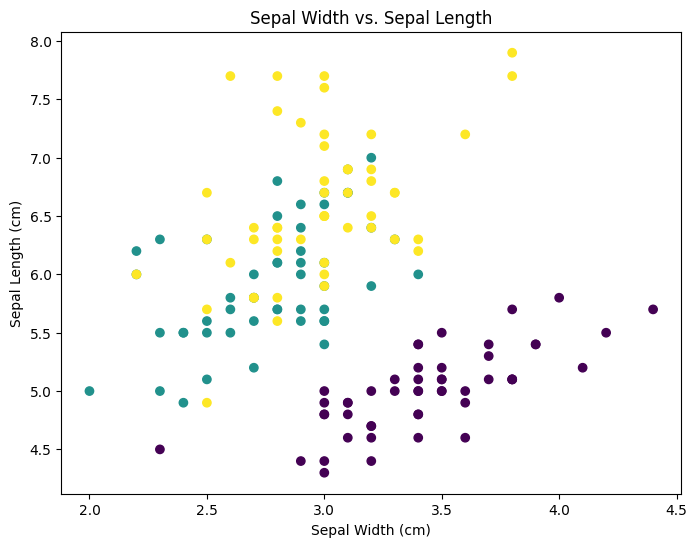

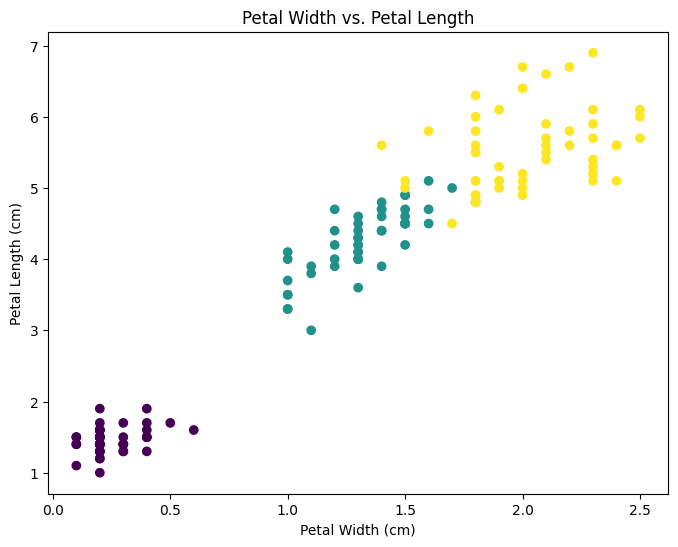

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

# iris 데이터셋 로드
iris = datasets.load_iris()

# 데이터 프레임 생성
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# sepal width vs. sepal length 그래프 생성
plt.figure(figsize=(8, 6))
plt.scatter(df['sepal width (cm)'], df['sepal length (cm)'], c=df['target'], cmap='viridis')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Width vs. Sepal Length')
plt.show()

# petal width vs. petal length 그래프 생성
plt.figure(figsize=(8, 6))
plt.scatter(df['petal width (cm)'], df['petal length (cm)'], c=df['target'], cmap='viridis')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Petal Width vs. Petal Length')
plt.show()

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from collections import Counter

# 하이퍼파라미터 설정
test_size = 0.2  # train:test = 8:2
batch_size = 4
epochs = 10
learning_rate = 0.01

# 데이터 로드 및 전처리
iris = load_iris()
X = iris.data.astype('float32')
y = iris.target

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분할 (stratify=y를 사용하여 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=42
)

# 클래스 분포 확인
print("Train dataset class distribution:", Counter(y_train))
print("Test dataset class distribution:", Counter(y_test))

# PyTorch 텐서로 변환
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()

# 데이터셋 및 데이터로더 생성
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 모델 정의
class IrisClassifier(nn.Module):
    def __init__(self, input_size=4, hidden_size=8, num_classes=3):
        super(IrisClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 모델, 손실 함수, 옵티마이저 설정
model = IrisClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 모델 학습
for epoch in range(epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# 테스트 데이터셋으로 모델 평가
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')

Train dataset class distribution: Counter({0: 40, 2: 40, 1: 40})
Test dataset class distribution: Counter({0: 10, 2: 10, 1: 10})
Accuracy: 96.67%


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11565453.29it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 348059.07it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3187732.75it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3447435.54it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch  1/10 Valid : 100%|██████████| 188/188 [00:17<00:00, 10.54it/s, Valid Loss: 0.0001, Valid Acc: 98.367%]


--------------------------------------------------------------------------------------------------------------


Epoch  2/10 Valid : 100%|██████████| 188/188 [00:18<00:00, 10.31it/s, Valid Loss: 0.0002, Valid Acc: 98.667%]


--------------------------------------------------------------------------------------------------------------


Epoch  3/10 Valid : 100%|██████████| 188/188 [00:17<00:00, 10.46it/s, Valid Loss: 0.0002, Valid Acc: 98.825%]


--------------------------------------------------------------------------------------------------------------


Epoch  4/10 Valid : 100%|██████████| 188/188 [00:17<00:00, 10.89it/s, Valid Loss: 0.0000, Valid Acc: 98.883%]


--------------------------------------------------------------------------------------------------------------


Epoch  5/10 Valid : 100%|██████████| 188/188 [00:17<00:00, 10.86it/s, Valid Loss: 0.0000, Valid Acc: 98.858%]


--------------------------------------------------------------------------------------------------------------


Epoch  6/10 Valid : 100%|██████████| 188/188 [00:17<00:00, 10.98it/s, Valid Loss: 0.0000, Valid Acc: 99.033%]


--------------------------------------------------------------------------------------------------------------


Epoch  7/10 Valid : 100%|██████████| 188/188 [00:17<00:00, 10.98it/s, Valid Loss: 0.0000, Valid Acc: 98.925%]


--------------------------------------------------------------------------------------------------------------


Epoch  8/10 Valid : 100%|██████████| 188/188 [00:18<00:00, 10.01it/s, Valid Loss: 0.0000, Valid Acc: 98.983%]


--------------------------------------------------------------------------------------------------------------


Epoch  9/10 Valid : 100%|██████████| 188/188 [00:18<00:00, 10.03it/s, Valid Loss: 0.0000, Valid Acc: 98.950%]


--------------------------------------------------------------------------------------------------------------
Validation loss didn't improve for 3 epochs. Reducing learning rate.


Epoch 10/10 Valid : 100%|██████████| 188/188 [00:17<00:00, 10.79it/s, Valid Loss: 0.0000, Valid Acc: 99.175%]


--------------------------------------------------------------------------------------------------------------


Epoch 10/10 Test : 100%|██████████| 157/157 [00:13<00:00, 11.22it/s, Test Loss: 0.0000, Test Acc: 99.280%]


[tensor(9.5956e-05), tensor(0.0002), tensor(0.0002), tensor(2.7262e-05), tensor(1.9451e-05), tensor(2.4143e-06), tensor(8.4391e-06), tensor(2.6570e-06), tensor(2.1987e-05), tensor(1.1472e-05)]


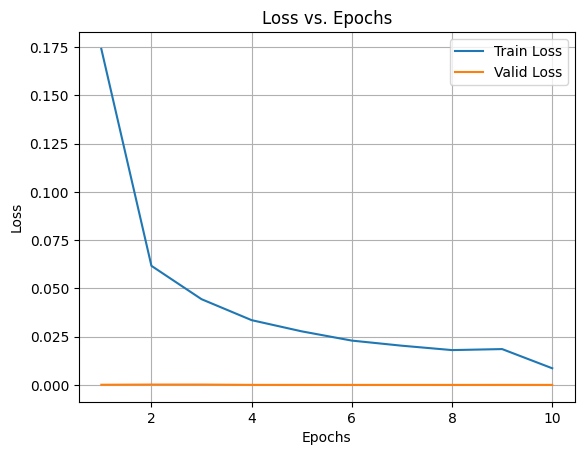

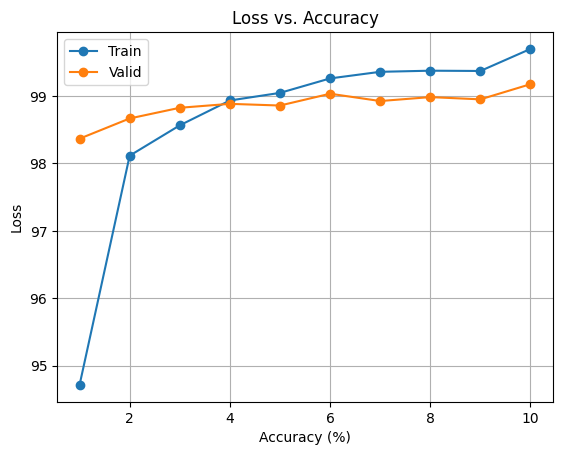

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from tqdm import tqdm

num_epochs = 10
batch_size = 64

# 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 데이터 전처리 및 변환
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 전체 훈련 데이터셋 로드
full_train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 훈련 데이터셋을 80% 훈련용과 20% 검증용으로 분할
train_size = int(0.8 * len(full_train_dataset))
valid_size = len(full_train_dataset) - train_size
train_dataset, valid_dataset = random_split(full_train_dataset, [train_size, valid_size])

# 테스트 데이터셋 로드
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 데이터로더 정의
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 모델 정의
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 합성곱 층
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        # 완전 연결 층
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)
        # 활성화 함수와 드롭아웃
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.relu(self.conv1(x))   # [batch_size, 32, 28, 28]
        x = self.relu(self.conv2(x))   # [batch_size, 64, 28, 28]
        x = self.pool(x)               # [batch_size, 64, 14, 14]
        x = self.dropout(x)
        x = x.view(-1, 64 * 14 * 14)   # 평탄화
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 학습 및 검증 과정에서 손실과 정확도를 저장할 리스트 초기화
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

# Learning rate 스케줄러를 위한 변수 초기화
patience = 3  # valid_loss가 개선되지 않아도 기다리는 에포크 수
best_valid_loss = float('inf')
epochs_without_improvement = 0

# 모델, 손실 함수, 옵티마이저 설정
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    startStr = f'Epoch {epoch+1:2d}/{num_epochs} \033[34m' + 'Train ' + '\033[0m'
    with tqdm(total=len(train_loader), desc=startStr) as pbar:
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * data.size(0)
            _, predicted = torch.max(outputs, 1)
            train_total += target.size(0)
            train_correct += (predicted == target).sum().item()
            pbar.update(1)
        train_loss = train_loss / train_total
        train_accuracy = 100 * train_correct / train_total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # 진행 바 끝날 때 메시지 수정
        str = f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.3f}%'
        pbar.set_postfix_str(str)

def valid_or_test(mode, model, device, dataloader):
    model.eval()
    loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        if mode == 'valid':
            startStr = f'Epoch {epoch+1:2d}/{num_epochs} \033[34m' + 'Valid ' + '\033[0m'
        elif mode == 'test':
            startStr = f'Epoch {epoch+1:2d}/{num_epochs} \033[34m' + 'Test ' + '\033[0m'

        with tqdm(total=len(dataloader), desc=startStr) as pbar:
        #print('\033[34m' + 'Validation ' + '\033[0m', end='')
            for data, target in dataloader:
                data, target = data.to(device), target.to(device)
                outputs = model(data)
                loss = criterion(outputs, target)

                loss += loss.item() * data.size(0)
                _, predicted = torch.max(outputs, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()
                pbar.update(1)

            loss = loss / total
            accuracy = 100 * correct / total
            if mode == 'valid':
                endStr = f'Valid Loss: {loss:.4f}, Valid Acc: {accuracy:.3f}%'
            elif mode == 'test':
                endStr = f'Test Loss: {loss:.4f}, Test Acc: {accuracy:.3f}%'
            pbar.set_postfix_str(endStr)

    if mode == 'valid':
        valid_losses.append(loss)
        valid_accuracies.append(accuracy)
        print('-'*110)

# 모델 학습 및 검증
for epoch in range(num_epochs):
    train(model, device, train_loader, optimizer, epoch)
    valid_or_test('valid', model, device, valid_loader)

    # 검증 손실 확인하여 학습률 조정
    if valid_losses[-1] < best_valid_loss:
        best_valid_loss = valid_losses[-1]
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print("Validation loss didn't improve for {} epochs. Reducing learning rate.".format(patience))
            for param_group in optimizer.param_groups:
                param_group['lr'] *= 0.5  # 학습률 0.5배 감소
            epochs_without_improvement = 0

valid_or_test('test', model, device, test_loader)

print(valid_losses)
# valid_losses의 device를 'cuda:0'에서 cpu로 변경
valid_losses = [loss.cpu().numpy() for loss in valid_losses]

train_losses, valid_losses

plt.figure()
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), valid_losses, label='Valid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 그래프 2: 손실 vs. 정확도
plt.figure()
plt.plot(range(1, num_epochs+1), train_accuracies, 'o-', label='Train')
plt.plot(range(1, num_epochs+1), valid_accuracies, 'o-', label='Valid')
plt.xlabel('Accuracy (%)')
plt.ylabel('Loss')
plt.title('Loss vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()